In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import itertools

In [ ]:
import scipy.spatial


rng = np.random.default_rng(12345678)
num_items = 4

grounding_vals = rng.uniform(size=(num_items, 1))
grounding_sims = scipy.spatial.distance.pdist(grounding_vals)

pairs = list(map(str, itertools.combinations(range(num_items), r=2)))
ypos = np.arange(len(pairs))
fig, ax = plt.subplots(figsize=(2, 3))
plt.barh(ypos, grounding_sims)
plt.yticks(ypos, labels=pairs)
plt.ylabel("Representation Pairs")
plt.xlabel("Similarity")
plt.title("Grounding")
plt.xlim(0, 1)

In [ ]:
def measure_sim_plot(sims: np.ndarray, seed: int, name: str, stddev:float):
    rng = np.random.default_rng(seed)
    measure_sims = np.abs(sims + stddev * rng.standard_normal(size=sims.shape))

    pairs = list(map(str, itertools.combinations(range(num_items), r=2)))
    ypos = np.arange(len(pairs))
    fig, ax = plt.subplots(figsize=(2, 3))
    plt.barh(ypos, measure_sims)
    plt.yticks(ypos, labels=pairs)
    plt.ylabel("Representation Pairs")
    plt.xlabel("Similarity")
    plt.title(f"Measure {name}")
    plt.xlim(0, 1)
    return fig

fig = measure_sim_plot(grounding_sims, 5678, "A", 0.1)
fig.savefig("../../figs/fig1_a.png", bbox_inches="tight")
measure_sim_plot(grounding_sims, 67890, "B", 0.2)
fig.savefig("../../figs/fig1_b.png", bbox_inches="tight")


In [ ]:
rng = np.random.default_rng(12345678)
num_items = 4

grounding_vals = rng.uniform(size=(num_items, 1))
grounding_sims = scipy.spatial.distance.pdist(grounding_vals)

pairs = list(map(str, itertools.combinations(range(num_items), r=2)))
ypos = np.arange(len(pairs))
fig, ax = plt.subplots(1, 3, figsize=(2 * 3, 3))

ax[0].barh(ypos, grounding_sims, color="blue")
ax[0].set_yticks(ypos, labels=pairs)
ax[0].set_ylabel("Representation Pairs")
ax[0].set_xlabel("Similarity")
ax[0].set_title("Grounding")
ax[0].set_xlim(0, 1)

sims = grounding_sims


seed, name, stddev = 5678, "A", 0.1
rng = np.random.default_rng(seed)
measure_sims = np.abs(sims + stddev * rng.standard_normal(size=sims.shape))
ax[1].barh(ypos, measure_sims, color="orange")
# ax[1].set_yticks(ypos, labels=pairs)
# ax[1].set_ylabel("Representation Pairs")
ax[1].set_xlabel("Similarity")
ax[1].set_title(f"Measure {name}")
ax[1].set_xlim(0, 1)
ax[1].tick_params(
    axis="y",
    which="both",
    left=False,
    labelleft=False,
)

seed, name, stddev = 67890, "B", 0.2
rng = np.random.default_rng(seed)
measure_sims = np.abs(sims + stddev * rng.standard_normal(size=sims.shape))
ax[2].barh(ypos, measure_sims, color="red")
# ax[2].set_yticks(ypos, labels=pairs)
# ax[2].set_ylabel("Representation Pairs")
ax[2].set_xlabel("Similarity")
ax[2].set_title(f"Measure {name}")
ax[2].set_xlim(0, 1)
ax[2].tick_params(
    axis="y",
    which="both",
    left=False,
    labelleft=False,
)
fig.savefig("../../figs/fig1_combined.png", bbox_inches="tight", dpi=400)

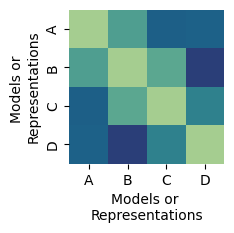

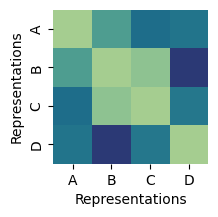

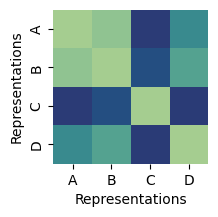

In [89]:
import seaborn as sns
import numpy as np
from pathlib import Path

base_path = Path("..", "..", "figs")
save_kwargs = dict(bbox_inches="tight", dpi=1200, transparent=True)
hm_kwargs = dict(vmin=0, vmax=1, cbar=False, cmap="crest_r")

rng = np.random.default_rng(456789)

grounding_sims = rng.uniform(size=(6,))

data = 1 - scipy.spatial.distance.squareform(grounding_sims)
fig = plt.figure(figsize=(2,2))
sns.heatmap(data, **hm_kwargs)
plt.ylabel("Models or \nRepresentations")
plt.xlabel("Models or \nRepresentations")
plt.xticks([0.5,1.5,2.5,3.5], "ABCD")
plt.yticks([0.5,1.5,2.5,3.5], "ABCD")
fig.savefig(base_path / "groundsim_hm.png", **save_kwargs)

data = 1 - scipy.spatial.distance.squareform(grounding_sims + 0.1 * rng.standard_normal(size=grounding_sims.shape))
np.fill_diagonal(data, 1)
fig = plt.figure(figsize=(2,2))
sns.heatmap(data, **hm_kwargs)
plt.ylabel("Representations")
plt.xlabel("Representations")
plt.xticks([0.5,1.5,2.5,3.5], "ABCD")
plt.yticks([0.5,1.5,2.5,3.5], "ABCD")
fig.savefig(base_path / "measure_a_hm.png", **save_kwargs)

data = 1 - scipy.spatial.distance.squareform(rng.uniform(size=(6,)))
np.fill_diagonal(data, 1)
fig = plt.figure(figsize=(2,2))
sns.heatmap(data, **hm_kwargs)
plt.ylabel("Representations")
plt.xlabel("Representations")
plt.xticks([0.5,1.5,2.5,3.5], "ABCD")
plt.yticks([0.5,1.5,2.5,3.5], "ABCD")
fig.savefig(base_path / "measure_b_hm.png", **save_kwargs)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example similarity scores and grounding properties
similarity_scores = [
    [1.0, 0.8, 0.5],
    [0.8, 1.0, 0.6],
    [0.5, 0.6, 1.0]
]
grounding_properties = [
    ['High', 'Medium', 'Low'],
    ['Medium', 'High', 'Medium'],
    ['Low', 'Medium', 'High']
]

# Create heatmap
ax = sns.heatmap(similarity_scores, annot=grounding_properties, fmt='', cmap='coolwarm')
plt.show()
